In [250]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [371]:
# 3P1 linewidth 
Gamma = 182e3 * 2 * np.pi

# I_sat: 0.14 W/cm^2
I_sat = 0.14

def _Freq_offset(B=5):
    return (np.array([0, 3, 3, 0]) + 1.4*B*np.array([0, 1, 2, 3]))*2e6*np.pi

Freq_offset = _Freq_offset(40)
#np.array([0, 23, 43, 60]) * 2e6 * np.pi

# Branching ratio:
# --    --    --   --
#  \    |     /
#   1  2/3  1/3

#       --

In [372]:
# Freq_offset/(2e6*np.pi)

In [373]:
# tensor Stark shift + Zeeman for 3P1 state / 2\pi
# (3/2, -1/2): offset = 0
def FreqOffset_3P1(B=40):
    Freq_diff = np.array([3, 0, -3]) + B * np.ones(3) * 1.4
    # return Freq_diff
    return (np.cumsum(Freq_diff))# * 1e6 * 2 * np.pi

In [374]:
def R_sc(detuning, I=I_sat):
    return Gamma/2*(I/I_sat)/(1+4*(detuning/Gamma)**2+I/I_sat)

In [375]:
1/3*R_sc(23*2e6*np.pi, 5*I_sat)

14.916135983733891

In [376]:
1/3*R_sc(43*2e6*np.pi, 5*I_sat)

4.267801518951565

In [377]:
1/3*R_sc(0, 5*I_sat)

158824.961931484

In [378]:
1/(1/3*R_sc(23*2e6*np.pi, 5*I_sat))

0.06704149124749896

In [379]:
I_exp = I_sat*5
theta_pol = 45

def R_12(detuning=0, theta=theta_pol/180*np.pi, I=I_exp):
    sc_1 = 1/3*R_sc(Freq_offset[1]+detuning, I=I*np.sin(theta)**2*2/3)
    sc_2 = 2/3*R_sc(Freq_offset[2]+detuning, I=I*np.cos(theta)**2/2*1/3)
    R_12 = sc_1 + sc_2
    return R_12

def R_21(detuning=0, theta=theta_pol/180*np.pi, I=I_exp):
    sc_2 = 1/3*R_sc(Freq_offset[2]+detuning, I=I*np.sin(theta)**2*2/3)
    sc_1 = 2/3*R_sc(Freq_offset[1]+detuning, I=I*np.cos(theta)**2/2*1/3)
    R_21 = sc_2 + sc_1
    return R_21

In [380]:
def sol(t, P1_0=1, detuning=0, theta=theta_pol/180*np.pi, I=I_exp):
#     def R_12(detuning=0, theta=theta_pol/180*np.pi, I=I_exp):
#         sc_1 = 1/3*R_sc(Freq_offset[1]+detuning, I=I*np.sin(theta)**2*2/3)
#         sc_2 = 2/3*R_sc(Freq_offset[2]+detuning, I=I*np.cos(theta)**2/2*1/3)
#         R_12 = sc_1 + sc_2
#         return R_12

#     def R_21(detuning=0, theta=theta_pol/180*np.pi, I=I_exp):
#         sc_2 = 1/3*R_sc(Freq_offset[2]+detuning, I=I*np.sin(theta)**2*2/3)
#         sc_1 = 2/3*R_sc(Freq_offset[1]+detuning, I=I*np.cos(theta)**2/2*1/3)
#         R_21 = sc_2 + sc_1
#         return R_21
    
    R21 = R_21(detuning, theta, I)
    R12 = R_12(detuning, theta, I)
    P1_t = (P1_0-R21/(R12+R21))*np.exp((-R12-R21)*t)+R21/(R12+R21)
    P2_t = 1-P1_t
    return P1_t, P2_t

In [381]:
num = 101
tList = np.linspace(0, 1, num)
P1_list = np.empty(num)
P2_list = np.empty(num)
for i in range(num):
    P1_list[i] = sol(tList[i])[0]
    P2_list[i] = sol(tList[i])[1]

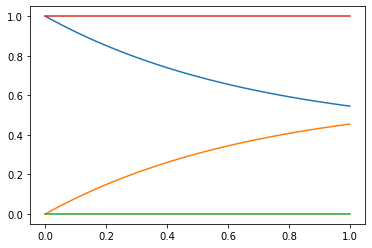

In [382]:
plt.plot(tList, P1_list)
plt.plot(tList, P2_list)
plt.plot(tList, np.zeros(num))
plt.plot(tList, np.ones(num))

In [383]:
I_exp = 2*I_sat

def R_12_img(detuning=0, I=I_exp):
    sc_1 = 1/3*R_sc(Freq_offset[1]+detuning, I=I*1/3*2/3)
    sc_2 = 2/3*R_sc(Freq_offset[2]+detuning, I=I*1/3*1/3)
    R_12 = sc_1 + sc_2
    return R_12

def R_21_img(detuning=0, I=I_exp):
    sc_2 = 1/3*R_sc(Freq_offset[2]+detuning, I=I*1/3*2/3)
    sc_1 = 2/3*R_sc(Freq_offset[1]+detuning, I=I*1/3*1/3)
    R_21 = sc_2 + sc_1
    return R_21

In [384]:
def sol_img(t, P1_0=1, detuning=0, I=I_exp):
    
    R21 = R_21_img(detuning, I)
    R12 = R_12_img(detuning, I)
    P1_t = (P1_0-R21/(R12+R21))*np.exp((-R12-R21)*t)+R21/(R12+R21)
    P2_t = 1-P1_t
    return P1_t, P2_t

In [385]:
num = 101
tList = np.linspace(0, .1, num)
P1_list = np.empty(num)
P2_list = np.empty(num)
for i in range(num):
    P1_list[i] = sol_img(tList[i])[0]
    P2_list[i] = sol_img(tList[i])[1]

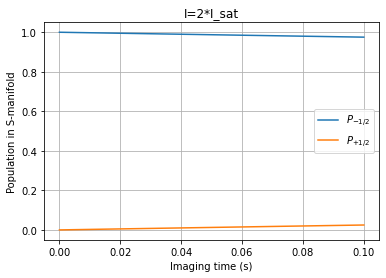

In [386]:
plt.plot(tList, P1_list, label='$P_{-1/2}$')
plt.plot(tList, P2_list, label='$P_{+1/2}$')
# plt.plot(tList, np.zeros(num))
# plt.plot(tList, np.ones(num))
plt.xlabel('Imaging time (s)')
plt.ylabel('Population in S-manifold')
plt.legend()
plt.title('I=2*I_sat')
plt.grid()

In [370]:
t_img = 0.05 # 100 ms imaging time
detuning_m1h = np.linspace(10, 100, 19)*2e6*np.pi
detuning_p1h = detuning_m1h*2-3*2e6*np.pi

In [309]:
I_exp = 4*I_sat

def R_12_img(detuning_index=0, I=I_exp):
    sc_1 = 1/3*R_sc(detuning_m1h[detuning_index], I=I*1/3*2/3)
    sc_2 = 2/3*R_sc(detuning_p1h[detuning_index], I=I*1/3*1/3)
    R_12 = sc_1 + sc_2
    return R_12

def R_21_img(detuning_index=0, I=I_exp):
    sc_2 = 1/3*R_sc(detuning_p1h[detuning_index], I=I*1/3*2/3)
    sc_1 = 2/3*R_sc(detuning_m1h[detuning_index], I=I*1/3*1/3)
    R_21 = sc_2 + sc_1
    return R_21

In [310]:
def sol_img(t, P1_0=1, detuning_index=0, I=I_exp):
    
    R21 = R_21_img(detuning_index, I)
    R12 = R_12_img(detuning_index, I)
    P1_t = (P1_0-R21/(R12+R21))*np.exp((-R12-R21)*t)+R21/(R12+R21)
    P2_t = 1-P1_t
    return P1_t, P2_t

In [311]:
P_m1h_list = []
P_m2h_list = []

for i in range(len(detuning_m1h)):
    P_m1h_list.append(sol_img(t_img, detuning_index=i)[0])
    P_m2h_list.append(sol_img(t_img, detuning_index=i)[1])

Text(0.5, 1.0, 'I=4*I_sat, imaging time 50 ms')

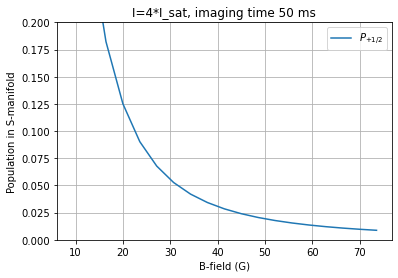

In [313]:
# plt.plot((detuning_m1h/2e6/np.pi+3)/1.4, P_m1h_list, label='$P_{-1/2}$')
plt.plot((detuning_m1h/2e6/np.pi+3)/1.4, P_m2h_list, label='$P_{+1/2}$')
plt.ylim([-0.0, 0.2])
plt.grid()
plt.legend()
plt.xlabel('B-field (G)')
plt.ylabel('Population in S-manifold')
plt.title('I=4*I_sat, imaging time 50 ms')

Text(0.5, 1.0, 'I=4*I_sat, imaging time 30 ms')

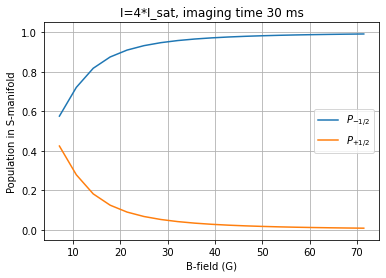

In [304]:
plt.plot(detuning_m1h/2e6/np.pi/1.4, P_m1h_list, label='$P_{-1/2}$')
plt.plot(detuning_m1h/2e6/np.pi/1.4, P_m2h_list, label='$P_{+1/2}$')
plt.ylim([-0.05, 1.05])
plt.grid()
plt.legend()
plt.xlabel('B-field (G)')
plt.ylabel('Population in S-manifold')
plt.title('I=4*I_sat, imaging time 30 ms')